In [1]:
# Set Up and go ...
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from mpl_toolkits.mplot3d import proj3d
import io
import os
import scipy.stats as st
# Get the elastic net ensemble data
endata = pd.read_csv('Source_Data/elasticnet_county_only_risks.csv')
# Get the OLS ensemble data
olsdata = pd.read_csv('Source_Data/ols_county_only_risks.csv')
%matplotlib notebook

In [3]:
# Display columns
endata.columns.values, olsdata.columns.values

(array(['Unnamed: 0', 'smoking_tr', 'obesity', 'foodenv_tr',
        'gauss_exercise', 'noinsurance_tr', 'physicians_tr', 'pollution',
        'diabetes', 'sunlight'], dtype=object),
 array(['Unnamed: 0', 'smoking_tr', 'obesity', 'foodenv_tr',
        'gauss_exercise', 'noinsurance_tr', 'physicians_tr', 'pollution',
        'diabetes', 'sunlight'], dtype=object))

In [4]:
# We need to drop the unnamed one, reorder them to smoking, obesity, diabetes, insurance, physicians,
# food_env, exercise, pollution, and sunlight ..., and rename them.
# Drop
endata = endata.drop(columns = 'Unnamed: 0')
olsdata = olsdata.drop(columns = 'Unnamed: 0')
# Reorder
endata = endata[['smoking_tr','diabetes','obesity','noinsurance_tr','physicians_tr','gauss_exercise','foodenv_tr',
                'pollution','sunlight']]
olsdata = olsdata[['smoking_tr','diabetes','obesity','noinsurance_tr','physicians_tr','gauss_exercise','foodenv_tr',
                'pollution','sunlight']]
# Rename
endata.columns = ['Smoking','Diabetes','Obesity','No Health Insurance','10x Physician Density','Better Access to Exercise',
                 'Better Access to Healthy Food','Less Pollution','More Sunlight']
olsdata.columns = ['Smoking','Diabetes','Obesity','No Health Insurance','10x Physician Density','Better Access to Exercise',
                 'Better Access to Healthy Food','Less Pollution','More Sunlight']

In [5]:
# Express the values as percentages
endata = endata * 100
olsdata = olsdata * 100
olsdata.describe()

,Smoking,Diabetes,Obesity,No Health Insurance,10x Physician Density,Better Access to Exercise,Better Access to Healthy Food,Less Pollution,More Sunlight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,230.852139,105.985521,76.322799,3.962590,-1.709825,-2.327411,-4.016031,-4.446674,3.206993
std,13.396043,14.856247,7.902841,0.992167,0.572292,0.580199,0.454839,0.391943,0.478436
min,195.705918,58.174745,58.044870,1.043072,-2.915804,-4.004909,-5.125691,-5.462872,1.826593
25%,220.944963,95.314848,71.844961,3.378292,-2.145002,-2.719081,-4.307837,-4.676758,2.906105
50%,229.831321,107.607911,77.137980,4.004340,-1.679791,-2.298954,-3.982398,-4.426697,3.139414
75%,240.068009,114.445177,82.187093,4.547938,-1.294197,-1.932891,-3.781335,-4.190300,3.519904
max,264.604375,136.858596,94.086443,6.157390,-0.307924,-1.189228,-2.675573,-3.495353,4.296877


In [6]:
# Grab y values
riskchange = list(olsdata.mean())
riskchange

[230.8521391124824,
 105.9855212289465,
 76.32279896896894,
 3.9625902033219766,
 -1.7098250067374448,
 -2.32741126511949,
 -4.016030667143384,
 -4.4466737285115,
 3.206992515425345]

In [7]:
# Grab x labels
risklabels = list(olsdata.columns)
risklabels

['Smoking',
 'Diabetes',
 'Obesity',
 'No Health Insurance',
 '10x Physician Density',
 'Better Access to Exercise',
 'Better Access to Healthy Food',
 'Less Pollution',
 'More Sunlight']

In [8]:
# Grab error bars
riskerrors = st.norm.ppf(0.95) * olsdata.std()
riskerrors

Smoking                          22.034530
Diabetes                         24.436352
Obesity                          12.999016
No Health Insurance               1.631970
10x Physician Density             0.941336
Better Access to Exercise         0.954342
Better Access to Healthy Food     0.748144
Less Pollution                    0.644689
More Sunlight                     0.786958
dtype: float64

In [9]:
# Create colorlist based on outcome
colorlist = []
for ix in range(len(riskchange)):
    if riskchange[ix] > 0:
        colorlist.append('red')
    else:
        colorlist.append('green')
colorlist

['red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'red']

<IPython.core.display.Javascript object>


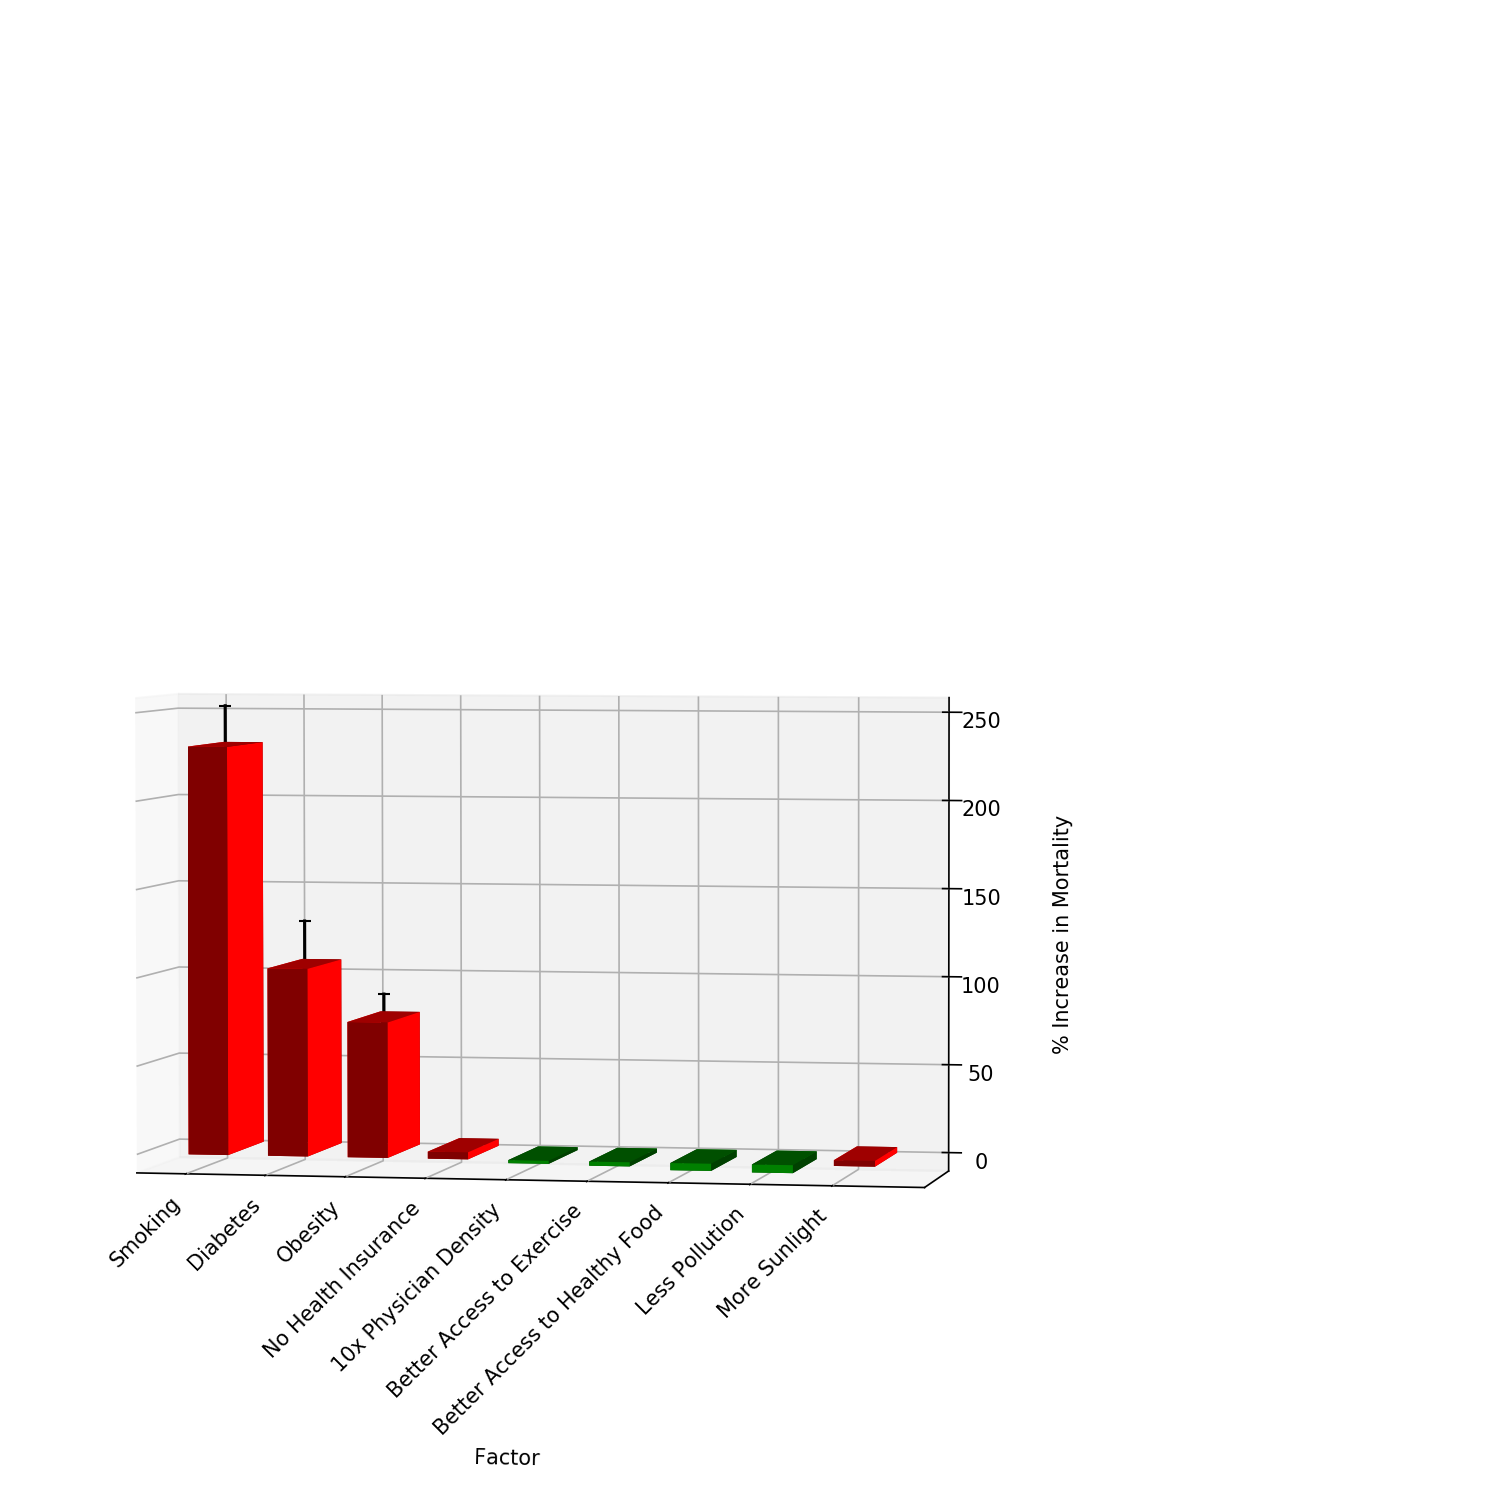

In [57]:
# Create figure
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d', adjustable = 'box')
x = np.arange(0,36,4)
y = np.ones(9)
width = 2
depth = 0.5
top = np.array(riskchange)
bottom = 0.0
# Parameters for re-scaling plot box in 3D
# Set these three
x_scale=5
y_scale=1
z_scale=3
# Leave these alone
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3]=1.0
# Matplotlib code modification needed to make rescaling work
def short_proj():
  return np.dot(Axes3D.get_proj(ax1), scale)

ax1.get_proj=short_proj
# Draw the bar graph, ticks, and labels
ax1.bar3d(x, y, bottom, width, depth, top, color = colorlist, alpha = 0.5, shade=True)
ax1.set_xticks(np.arange(0,36,4))
ax1.set_xticklabels(risklabels)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')
ax1.set_yticks([])
ax1.set_xlabel('Factor')
ax1.set_zlabel('% Increase in Mortality')
ax1.xaxis.labelpad = 140
ax1.zaxis.labelpad = 20
# Title
fig.suptitle = 'Estimated Impacts on 2015-2016 Age Adjusted Mortality Rate'
# Draw the error bars
for i in np.arange(0, len(x)):
    ax1.plot([x[i] + width / 2.0, x[i] + width / 2.0],
             [y[i] + depth / 2.0, y[i] + depth / 2.0],
             [top[i] - riskerrors[i] , top[i] + riskerrors[i]], color = 'k', marker="_")
# Adjust view
ax1.view_init(elev = 2, azim = 280)


In [10]:
plt.savefig('Graphics_Output/factorgraph.png')

<Figure size 432x288 with 0 Axes>